## The purpose of this side project is to calculate the NDVI given a multi-band raster file

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import rasterio

import numpy as np

from rasterio.plot import show

## Step1 : Data Preparation

### We need to download our data with the help of modules os and urllib

In [5]:
import os
import urllib
import urllib.request

def get_filename(url):
    """
    Parses filename from given url
    """
    if url.find('/'):
        return url.rsplit('/', 1)[1]
#Save it at
outdir = r"C:\GIS Open Source\Python\RasterProcessing\NDVI"

#Specify where to download shared data (Github)
url = "https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif"

#Download files

fname = get_filename(url)
outfp = os.path.join(outdir, fname)

if not os.path.exists(outfp):
    print("Downloading", fname)
    r = urllib.request.urlretrieve(url, outfp)

## Step 2: Read and Visualize the Data

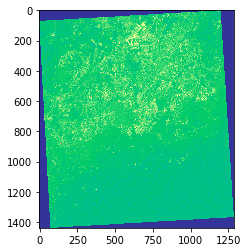

In [7]:
filepath = r"C:\GIS Open Source\Python\RasterProcessing\NDVI\Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif"
raster = rasterio.open(filepath)

#Visualize the raster file
show(raster, cmap = 'terrain')

## Step 3: Analyze and Calculate the Pertinent Data

For calculating the NDVI (Normalized difference vegetation index) you need two bands: band-4 which is the Red channel and band-5 which is the Near Infrared (NIR)

In [8]:
#So Let's read these two bands!

red = raster.read(4)
nir = raster.read(5)
red
nir
print('type of red', type(red))
print('type of nir', type(nir))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

type of red <class 'numpy.ndarray'>
type of nir <class 'numpy.ndarray'>


Apparently, rasterio reads the raster files as numpy arrays with values for each cell.

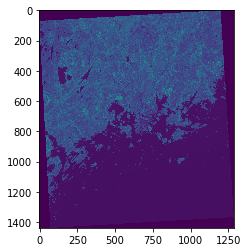

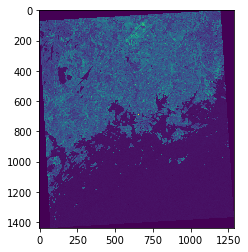

In [9]:
show(red)
show(nir)

In [10]:
#Now the dtype is int, let's change it to float

red = red.astype(float)
nir = nir.astype(float)

Since NDVI calculation requires division of these two bands, we need to change the default setting so that the division of 0 won't raise unexpected exceptions.

In [11]:
help(np.seterr)
np.seterr(divide='ignore', invalid='ignore')

Help on function seterr in module numpy.core.numeric:

seterr(all=None, divide=None, over=None, under=None, invalid=None)
    Set how floating-point errors are handled.
    
    Note that operations on integer scalar types (such as `int16`) are
    handled like floating point, and are affected by these settings.
    
    Parameters
    ----------
    all : {'ignore', 'warn', 'raise', 'call', 'print', 'log'}, optional
        Set treatment for all types of floating-point errors at once:
    
        - ignore: Take no action when the exception occurs.
        - warn: Print a `RuntimeWarning` (via the Python `warnings` module).
        - raise: Raise a `FloatingPointError`.
        - call: Call a function specified using the `seterrcall` function.
        - print: Print a warning directly to ``stdout``.
        - log: Record error in a Log object specified by `seterrcall`.
    
        The default is not to change the current behavior.
    divide : {'ignore', 'warn', 'raise', 'call', 'pri

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
raster.shape

(1439, 1288)

Now we need to initialize the ndvi with zeros before we do the calculations

In [13]:
#Preparations before calculation
ndvi = np.empty(raster.shape, dtype=rasterio.float32)

Calculate NDVI value

In [20]:
#We only need to calculate the pixel where there is a red or nir value
check = np.logical_or(red>0, nir>0)

#Calculate NDVI
ndvi = np.where ( check,  (nir - red ) / ( nir + red ), -999 )

In [21]:
ndvi
ndvi.mean()

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]])

-108.16964389074909

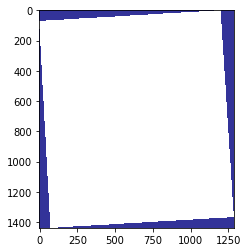

In [22]:
show(ndvi, cmap = 'terrain')